In [1]:
# import sys
# sys.path.append("/Users/uchihashi_k/anaconda/lib/python2.7/site-packages")
%pylab inline
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import six
project_path = os.getcwd() + '/../'
sys.path.append(project_path + "utils")

import sklearn.metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.grid_search import GridSearchCV
import sklearn
from sklearn.externals import joblib
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
import function
import preprocessing
import local_bayes
import visualize
import metrics
import analysis

In [4]:
sys.path.append(project_path + "models/cnn")
import cnn

# data load

In [5]:
data_name_ls = ['science', 'ajax', 'java', 'news', 'css', 'javascript', 'opensource', 'webdesign', 'design', 'linux', 'photography', 'all']
train_0_0, test_0_0, test_0_1 = {}, {}, {}
for data_name in data_name_ls:
    save_data_dir = '../data/bookmark/%s/' % data_name 
    train_0_0.update({data_name:numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')})
#     valid_0_0.update({data_name:numpy.load(save_data_dir + '0_test/0_fold/0_valid.npz')})
    test_0_0.update({data_name:numpy.load(save_data_dir + '0_test/0_fold/0_test.npz')})
    test_0_1.update({data_name:numpy.load(save_data_dir + '0_test/1_fold/1_test.npz')})

In [6]:
data_name_ls = ['science', 'ajax', 'java', 'news', 'css', 'javascript', 'opensource', 'webdesign', 'design', 'linux', 'photography']
train_0_0_30, test_0_0_30, test_0_1_30 = {}, {}, {}
for data_name in data_name_ls:
    save_data_dir = '../data/bookmark/%s_30/' % data_name 
    train_0_0_30.update({data_name:numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')})
#     valid_0_0.update({data_name:numpy.load(save_data_dir + '0_test/0_fold/0_valid.npz')})
    test_0_0_30.update({data_name:numpy.load(save_data_dir + '0_test/0_fold/0_test.npz')})
    test_0_1_30.update({data_name:numpy.load(save_data_dir + '0_test/1_fold/1_test.npz')})

In [7]:
data_name_ls = ['science', 'ajax', 'java', 'news', 'css', 'javascript', 'opensource', 'webdesign', 'design', 'linux', 'photography']
train_0_0_60, test_0_0_60, test_0_1_60 = {}, {}, {}
for data_name in data_name_ls:
    save_data_dir = '../data/bookmark/%s_60/' % data_name 
    train_0_0_60.update({data_name:numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')})
#     valid_0_0.update({data_name:numpy.load(save_data_dir + '0_test/0_fold/0_valid.npz')})
    test_0_0_60.update({data_name:numpy.load(save_data_dir + '0_test/0_fold/0_test.npz')})
    test_0_1_60.update({data_name:numpy.load(save_data_dir + '0_test/1_fold/1_test.npz')})

In [10]:
test_0_0['ajax']['x'].shape

(2378, 30)

In [11]:
test_0_0_30['ajax']['x'].shape

(542, 30)

In [12]:
test_0_0_60['ajax']['x'].shape

(363, 30)

# learner analysis

In [13]:
localbayes = local_bayes.LocalBayes(nn_num=20, data_dim=30, max_dist=50)
analyze = analysis.Analysis()
visual = visualize.Visualize()

## Gradient Boosting Decision Tree

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

### model fit

In [15]:
max_depth = 4
n_estimators = 5000

In [22]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                         algorithm="SAMME",
                         n_estimators=5000)

In [23]:
bdt.fit(train_0_0_60['ajax']['x'], train_0_0_60['ajax']['y'])

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=5000, random_state=None)

In [24]:
joblib.dump(bdt, '../models/gbdt/results/ajax_60/bdt_%s_%s.pkl' % (max_depth, n_estimators)) 

['../models/gbdt/results/ajax_60/bdt_4_5000.pkl',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_01.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_02.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_03.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_04.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_05.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_06.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_07.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_08.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_09.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_10.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_11.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_12.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_13.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_14.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_15.npy',
 '../models/gbdt/results/ajax_60/bdt_4_5000.pkl_16.npy',
 '../models/gbdt/results/ajax_60/bdt_4

### model load

In [141]:
bdt = joblib.load('../models/gbdt/results/ajax_30/bdt_%s_%s.pkl' % (max_depth, n_estimators))

### miss pattern

In [143]:
pred_proba = bdt.predict_proba(test_0_0['all']['x'])

In [144]:
gbdt_pattern_x, gbdt_pattern_y, gbdt_pattern_ind = analyze.find_pattern(test_0_0['all']['x'], test_0_0['all']['y'], pred_proba)

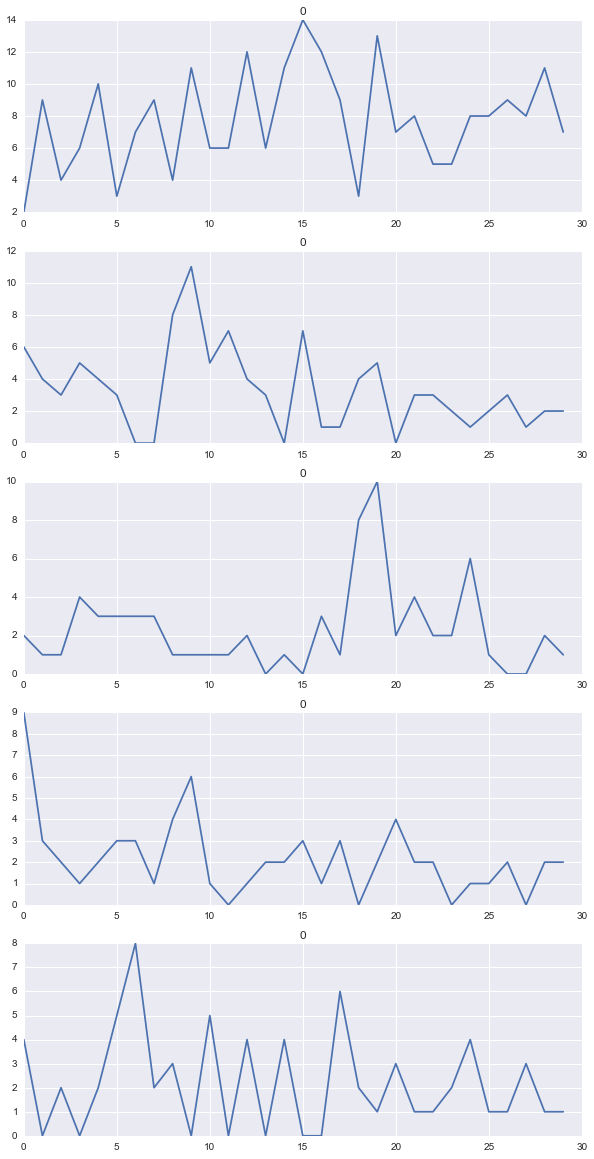

In [145]:
plt.figure(figsize=(10, 4*5), dpi=1000)
for i in xrange(5):
    plt.subplot(5, 1, i + 1)
    plt.plot(gbdt_pattern_x[i])
    plt.title('%s' % gbdt_pattern_y[i])

### correct pattern

In [146]:
gbdt_correct_x, gbdt_correct_y, gbdt_pattern_ind = analyze.find_pattern(test_0_0['all']['x'], test_0_0['all']['y'], pred_proba, type="correct")

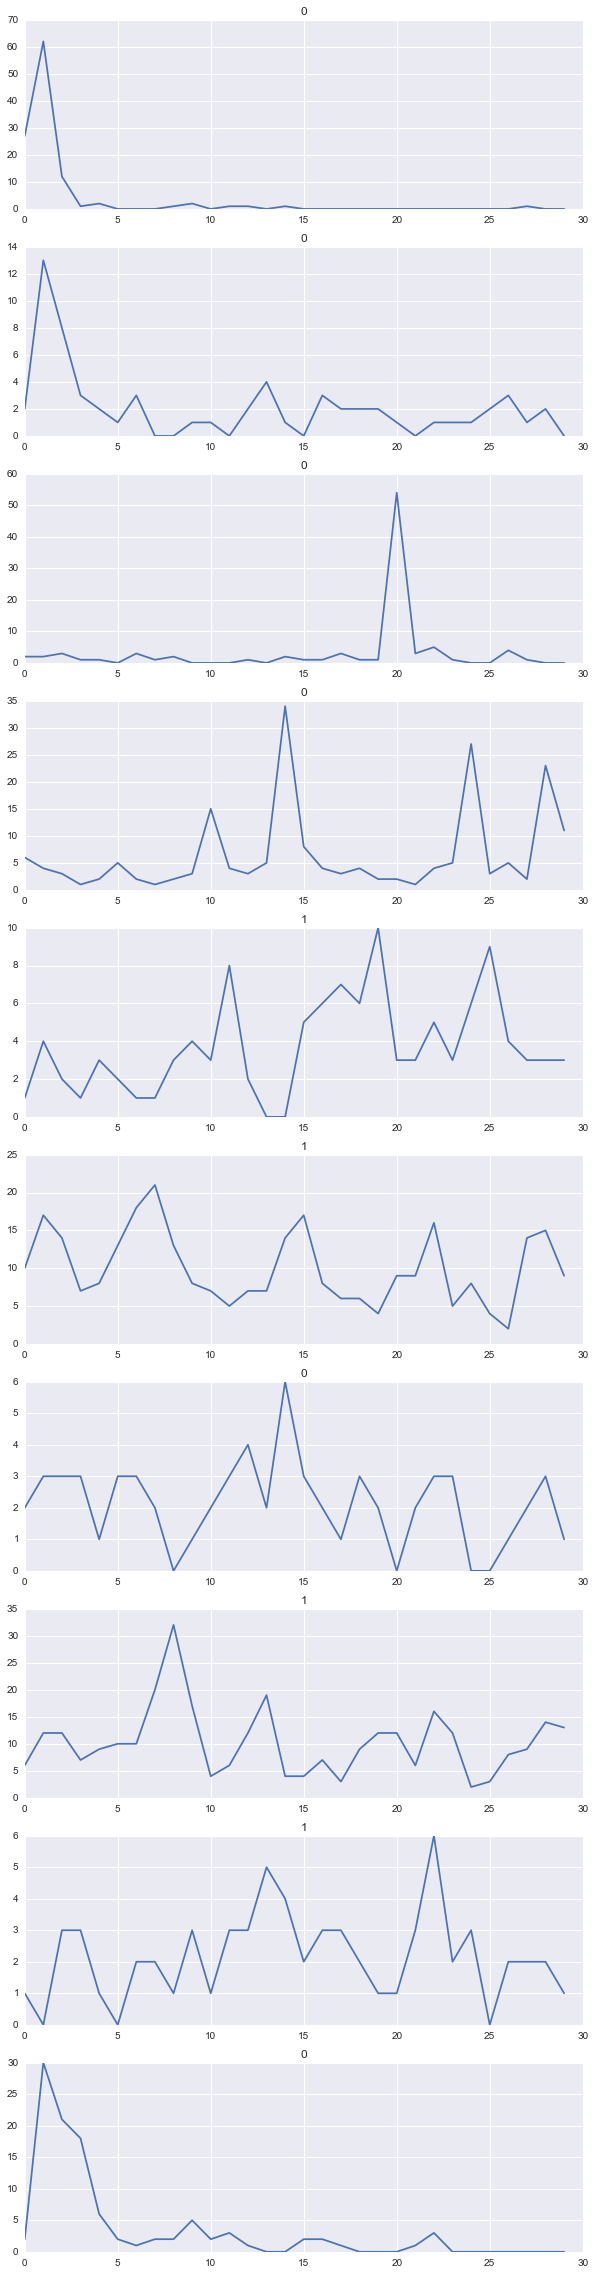

In [147]:
plt.figure(figsize=(10, 4*10), dpi=1000)
for i in xrange(10):
    plt.subplot(10, 1, i + 1)
    plt.plot(gbdt_correct_x[i])
    plt.title('%s' % gbdt_correct_y[i])

### ROC curve and AUC

In [61]:
bdt = joblib.load('../models/gbdt/results/ajax_60/bdt_%s_%s.pkl' % (max_depth, n_estimators))
test_score = bdt.decision_function(test_0_0_30['ajax']['x'])

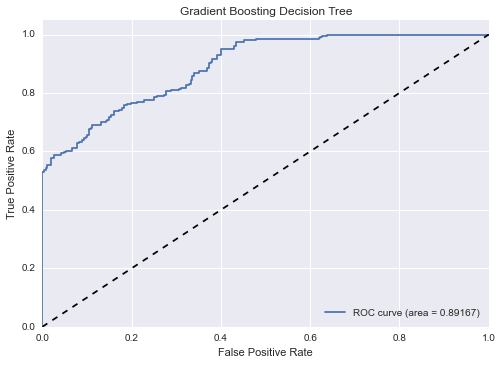

In [62]:
visual.roc_curve('Gradient Boosting Decision Tree', test_0_0_30['ajax'], test_score)

In [63]:
bdt = joblib.load('../models/gbdt/results/ajax_30/bdt_%s_%s.pkl' % (max_depth, n_estimators))
test_score = bdt.decision_function(test_0_0_60['ajax']['x'])

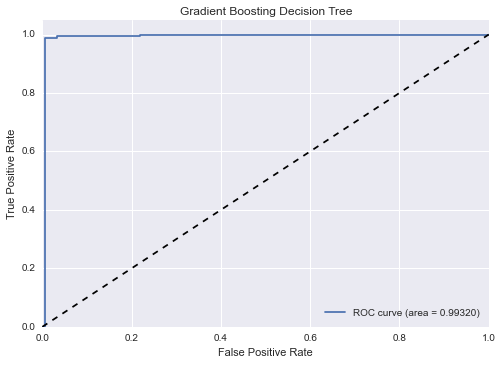

In [64]:
visual.roc_curve('Gradient Boosting Decision Tree', test_0_0_60['ajax'], test_score)

## 異なるドメインでテストした場合

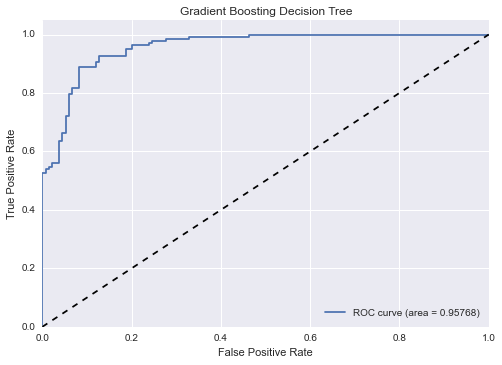

In [150]:
test_score = bdt.decision_function(test_0_0_30['ajax']['x'])
visual.roc_curve('Gradient Boosting Decision Tree', test_0_0_30['ajax'], test_score)

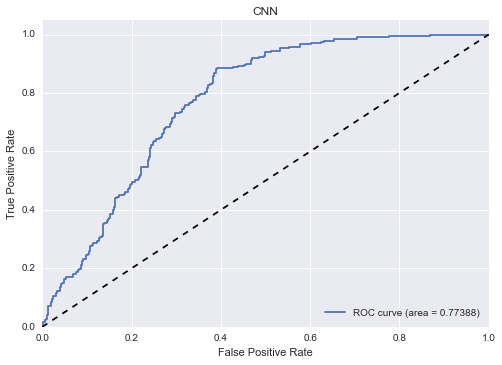

In [89]:
test_score = bdt.decision_function(test_0_0_30['css']['x'])
visual.roc_curve('CNN', test_0_0_30['css'], test_score)

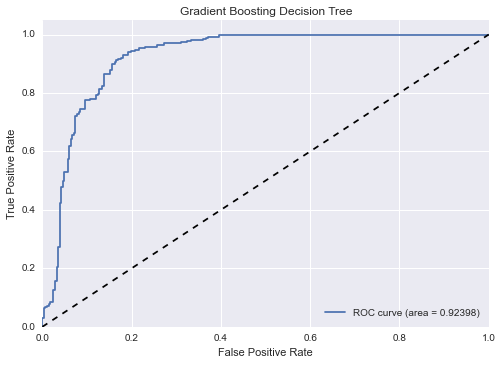

In [153]:
test_score = bdt.decision_function(test_0_0_30['design']['x'])
visual.roc_curve('Gradient Boosting Decision Tree', test_0_0_30['design'], test_score)

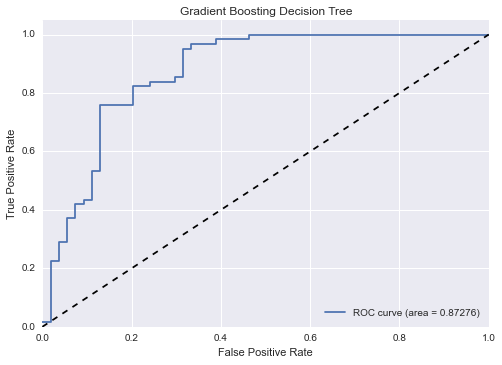

In [28]:
test_score = bdt.decision_function(test_0_0['java']['x'])
visual.roc_curve('Gradient Boosting Decision Tree', test_0_0['java'], test_score)

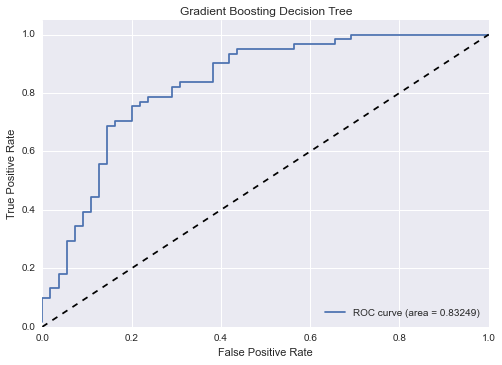

In [154]:
test_score = bdt.decision_function(test_0_0_30['news']['x'])
visual.roc_curve('Gradient Boosting Decision Tree', test_0_0_30['news'], test_score)

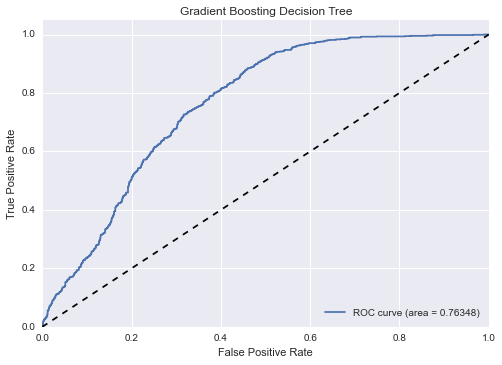

In [30]:
test_score = bdt.decision_function(test_0_0['design']['x'])
visual.roc_curve('Gradient Boosting Decision Tree', test_0_0['design'], test_score)

## CNN

In [29]:
import chainer
import chainer.functions as F
import chainer.links as L
from chainer import cuda
from chainer import optimizers
from chainer import serializers
from chainer import Link, Chain, ChainList

import pandas as pd
from ggplot import *

In [77]:
save_model_dir = '../models/cnn/results/ajax_50_30/'

In [78]:
sys.path.append(project_path + "models/cnn")
import cnn_net

## model load

In [79]:
cnnnet = cnn_net.tsCNN_net(30)

In [80]:
model = L.Classifier(cnnnet)

In [81]:
serializers.load_npz(save_model_dir + "mlp.model", model)

## prediction

In [82]:
N_test = test_0_0_60['ajax']['x'].shape[0]
data_dim = test_0_0_60['ajax']['x'].shape[1]

In [83]:
def forward(x_data, model):
    x = chainer.Variable(x_data)
    h = F.max_pooling_2d(F.relu(model.conv1(x)), 2)
    h = F.max_pooling_2d(F.relu(model.conv2(h)), 2)
    h = F.relu(model.l1(h))
    y = model.l2(h)

    return y

In [84]:
test_0_0_60['ajax']['x'].shape

(363, 30)

In [85]:
X_test = test_0_0_60['ajax']['x'].reshape((N_test, 1, 1, data_dim))
y_test = test_0_0_60['ajax']['y']
pred_ = []
for i in range(0, N_test):
    x = np.asarray(X_test[i]).reshape((1, 1, 1, data_dim)).astype(numpy.float32)
    y = np.asarray(y_test[i]).astype(numpy.int32)
    
    pred = F.softmax(model.predictor(chainer.Variable(x)))
    pred_.append(pred.data[0][1])

#### sample prediction

In [86]:
pred_[0:10]

[0.99988163,
 0.99843103,
 0.99097997,
 9.80069e-09,
 0.99897158,
 0.99897707,
 0.9997167,
 0.99508333,
 0.99120504,
 0.0]

#### sample answer

In [87]:
y_test[0:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

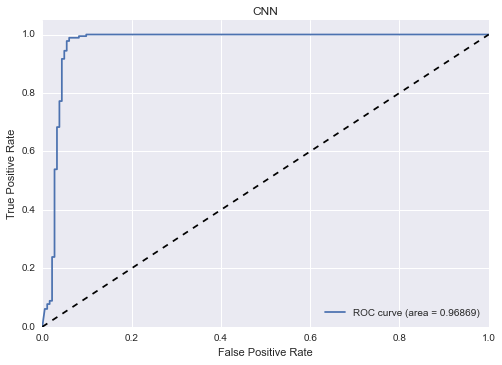

In [88]:
visual.roc_curve('CNN', test_0_0_60['ajax'], numpy.array(pred_))

## 他カテゴリのデータでの精度を検証

データ数: 1189


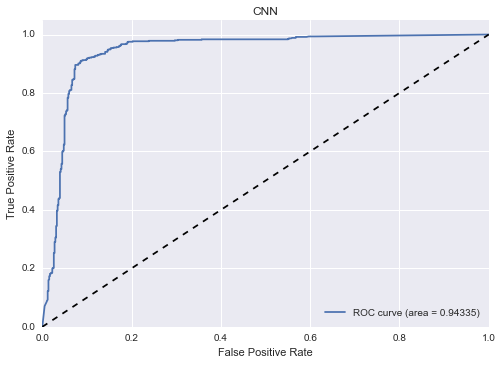

In [44]:
N_test = test_0_0['ajax']['x'].shape[0]
print "データ数: %s" % N_test

X_test = test_0_0['ajax']['x'].reshape((N_test, 1, 1, data_dim))
y_test = test_0_0['ajax']['y']
pred_ = []
for i in range(0, N_test):
    x = np.asarray(X_test[i]).reshape((1, 1, 1, data_dim)).astype(numpy.float32)
    y = np.asarray(y_test[i]).astype(numpy.int32)
    
    pred = F.softmax(model.predictor(chainer.Variable(x)))
    pred_.append(pred.data[0][1])

visual.roc_curve('CNN', test_0_0['ajax'], numpy.array(pred_))

データ数: 1679


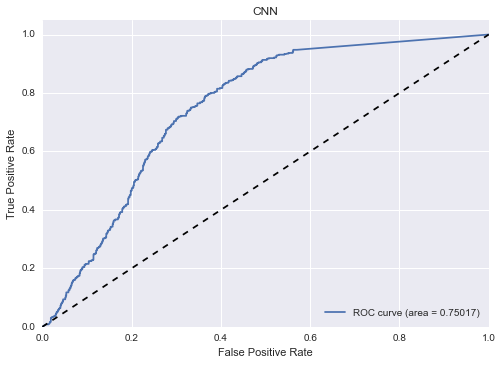

In [45]:
N_test = test_0_0['css']['x'].shape[0]
print "データ数: %s" % N_test

X_test = test_0_0['css']['x'].reshape((N_test, 1, 1, data_dim))
y_test = test_0_0['css']['y']
pred_ = []
for i in range(0, N_test):
    x = np.asarray(X_test[i]).reshape((1, 1, 1, data_dim)).astype(numpy.float32)
    y = np.asarray(y_test[i]).astype(numpy.int32)
    
    pred = F.softmax(model.predictor(chainer.Variable(x)))
    pred_.append(pred.data[0][1])

visual.roc_curve('CNN', test_0_0['css'], numpy.array(pred_))

データ数: 2171


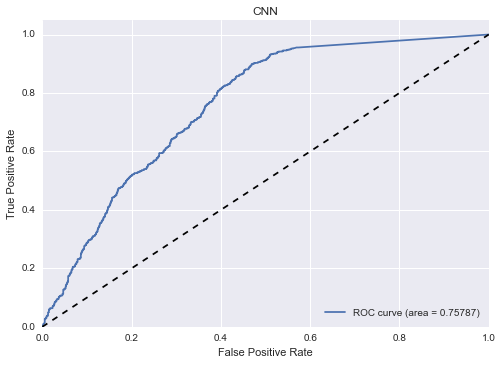

In [46]:
N_test = test_0_0['design']['x'].shape[0]
print "データ数: %s" % N_test

X_test = test_0_0['design']['x'].reshape((N_test, 1, 1, data_dim))
y_test = test_0_0['design']['y']
pred_ = []
for i in range(0, N_test):
    x = np.asarray(X_test[i]).reshape((1, 1, 1, data_dim)).astype(numpy.float32)
    y = np.asarray(y_test[i]).astype(numpy.int32)
    
    pred = F.softmax(model.predictor(chainer.Variable(x)))
    pred_.append(pred.data[0][1])

visual.roc_curve('CNN', test_0_0['design'], numpy.array(pred_))

データ数: 116


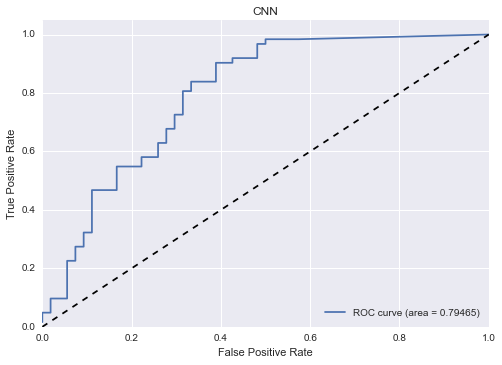

In [47]:
N_test = test_0_0['java']['x'].shape[0]
print "データ数: %s" % N_test

X_test = test_0_0['java']['x'].reshape((N_test, 1, 1, data_dim))
y_test = test_0_0['java']['y']
pred_ = []
for i in range(0, N_test):
    x = np.asarray(X_test[i]).reshape((1, 1, 1, data_dim)).astype(numpy.float32)
    y = np.asarray(y_test[i]).astype(numpy.int32)
    
    pred = F.softmax(model.predictor(chainer.Variable(x)))
    pred_.append(pred.data[0][1])

visual.roc_curve('CNN', test_0_0['java'], numpy.array(pred_))

データ数: 947


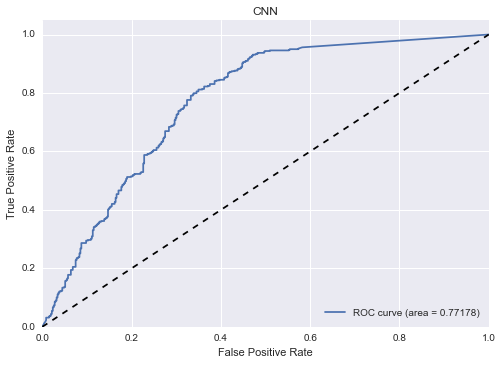

In [48]:
N_test = test_0_0['javascript']['x'].shape[0]
print "データ数: %s" % N_test

X_test = test_0_0['javascript']['x'].reshape((N_test, 1, 1, data_dim))
y_test = test_0_0['javascript']['y']
pred_ = []
for i in range(0, N_test):
    x = np.asarray(X_test[i]).reshape((1, 1, 1, data_dim)).astype(numpy.float32)
    y = np.asarray(y_test[i]).astype(numpy.int32)
    
    pred = F.softmax(model.predictor(chainer.Variable(x)))
    pred_.append(pred.data[0][1])

visual.roc_curve('CNN', test_0_0['javascript'], numpy.array(pred_))

データ数: 570


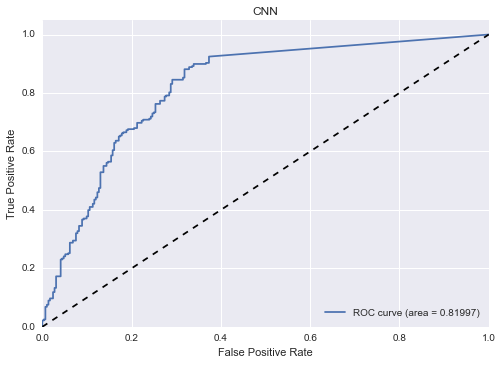

In [49]:
N_test = test_0_0['linux']['x'].shape[0]
print "データ数: %s" % N_test

X_test = test_0_0['linux']['x'].reshape((N_test, 1, 1, data_dim))
y_test = test_0_0['linux']['y']
pred_ = []
for i in range(0, N_test):
    x = np.asarray(X_test[i]).reshape((1, 1, 1, data_dim)).astype(numpy.float32)
    y = np.asarray(y_test[i]).astype(numpy.int32)
    
    pred = F.softmax(model.predictor(chainer.Variable(x)))
    pred_.append(pred.data[0][1])

visual.roc_curve('CNN', test_0_0['linux'], numpy.array(pred_))

データ数: 416


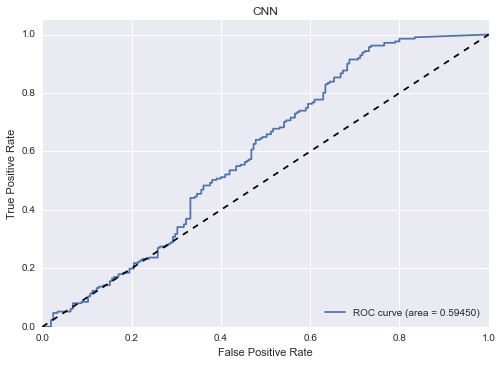

In [50]:
N_test = test_0_0['news']['x'].shape[0]
print "データ数: %s" % N_test

X_test = test_0_0['news']['x'].reshape((N_test, 1, 1, data_dim))
y_test = test_0_0['news']['y']
pred_ = []
for i in range(0, N_test):
    x = np.asarray(X_test[i]).reshape((1, 1, 1, data_dim)).astype(numpy.float32)
    y = np.asarray(y_test[i]).astype(numpy.int32)
    
    pred = F.softmax(model.predictor(chainer.Variable(x)))
    pred_.append(pred.data[0][1])

visual.roc_curve('CNN', test_0_0['news'], numpy.array(pred_))

データ数: 551


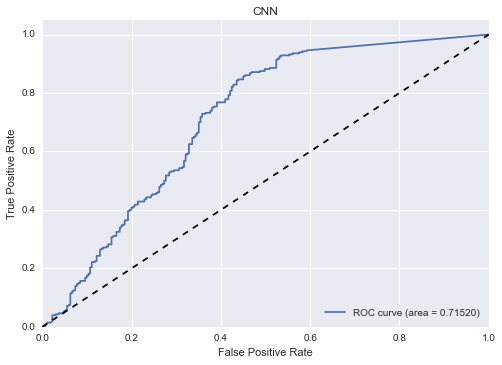

In [51]:
N_test = test_0_0['opensource']['x'].shape[0]
print "データ数: %s" % N_test

X_test = test_0_0['opensource']['x'].reshape((N_test, 1, 1, data_dim))
y_test = test_0_0['opensource']['y']
pred_ = []
for i in range(0, N_test):
    x = np.asarray(X_test[i]).reshape((1, 1, 1, data_dim)).astype(numpy.float32)
    y = np.asarray(y_test[i]).astype(numpy.int32)
    
    pred = F.softmax(model.predictor(chainer.Variable(x)))
    pred_.append(pred.data[0][1])

visual.roc_curve('CNN', test_0_0['opensource'], numpy.array(pred_))

データ数: 610


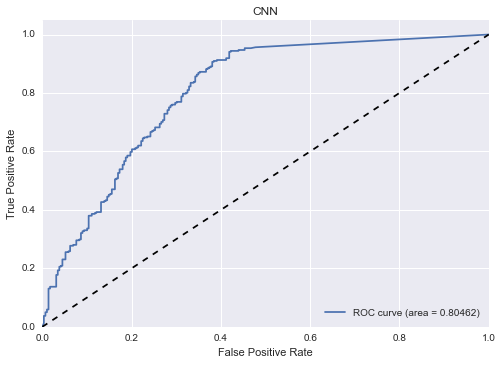

In [52]:
N_test = test_0_0['photography']['x'].shape[0]
print "データ数: %s" % N_test

X_test = test_0_0['photography']['x'].reshape((N_test, 1, 1, data_dim))
y_test = test_0_0['photography']['y']
pred_ = []
for i in range(0, N_test):
    x = np.asarray(X_test[i]).reshape((1, 1, 1, data_dim)).astype(numpy.float32)
    y = np.asarray(y_test[i]).astype(numpy.int32)
    
    pred = F.softmax(model.predictor(chainer.Variable(x)))
    pred_.append(pred.data[0][1])

visual.roc_curve('CNN', test_0_0['photography'], numpy.array(pred_))

データ数: 110


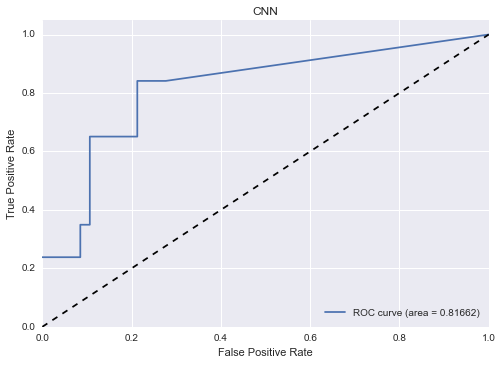

In [53]:
N_test = test_0_0['science']['x'].shape[0]
print "データ数: %s" % N_test

X_test = test_0_0['science']['x'].reshape((N_test, 1, 1, data_dim))
y_test = test_0_0['science']['y']
pred_ = []
for i in range(0, N_test):
    x = np.asarray(X_test[i]).reshape((1, 1, 1, data_dim)).astype(numpy.float32)
    y = np.asarray(y_test[i]).astype(numpy.int32)
    
    pred = F.softmax(model.predictor(chainer.Variable(x)))
    pred_.append(pred.data[0][1])

visual.roc_curve('CNN', test_0_0['science'], numpy.array(pred_))

データ数: 1577


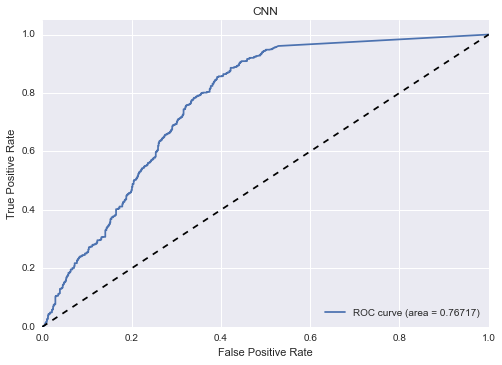

In [54]:
N_test = test_0_0['webdesign']['x'].shape[0]
print "データ数: %s" % N_test

X_test = test_0_0['webdesign']['x'].reshape((N_test, 1, 1, data_dim))
y_test = test_0_0['webdesign']['y']
pred_ = []
for i in range(0, N_test):
    x = np.asarray(X_test[i]).reshape((1, 1, 1, data_dim)).astype(numpy.float32)
    y = np.asarray(y_test[i]).astype(numpy.int32)
    
    pred = F.softmax(model.predictor(chainer.Variable(x)))
    pred_.append(pred.data[0][1])

visual.roc_curve('CNN', test_0_0['webdesign'], numpy.array(pred_))

# 他の学習器

## Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
lr_clf = LogisticRegression(C=0.01, penalty='l2')
lr_clf.fit(train_0_0['ajax']['x'], train_0_0['ajax']['y']) 

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

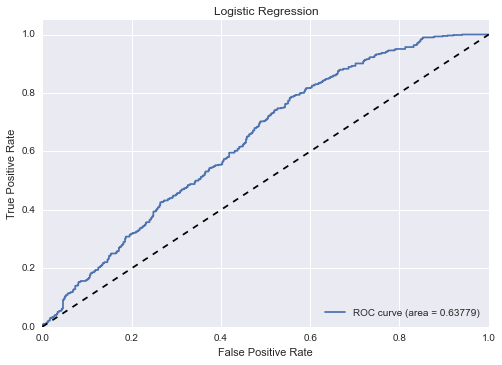

In [121]:
test_score = lr_clf.decision_function(test_0_0['ajax']['x'])
visual.roc_curve('Logistic Regression', test_0_0['ajax'], test_score)

## SVM

In [60]:
from sklearn.svm import SVC

In [61]:
clf = SVC(kernel='rbf', C=1000, gamma=0.001)
clf.fit(train_0_0['ajax']['x'], train_0_0['ajax']['y']) 

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

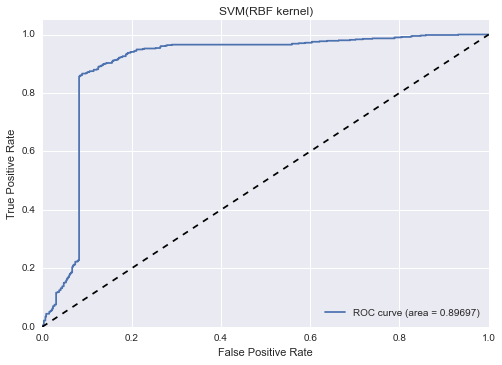

In [62]:
test_score = clf.decision_function(test_0_0['ajax']['x'])
visual.roc_curve('SVM(RBF kernel)', test_0_0['ajax'], test_score)

## Adaboost(弱)

In [63]:
bdt_w = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=500)

In [64]:
bdt_w.fit(train_0_0['ajax']['x'], train_0_0['ajax']['y'])

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=1, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=500, random_state=None)

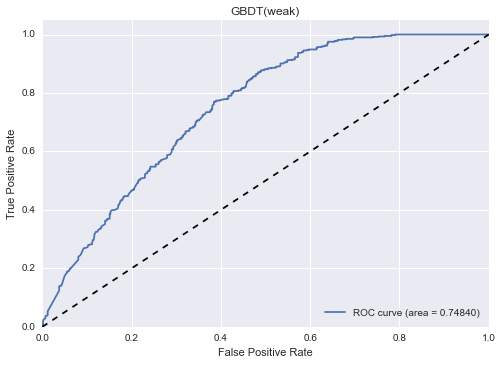

In [65]:
test_score = bdt_w.decision_function(test_0_0['ajax']['x'])
visual.roc_curve('GBDT(weak)', test_0_0['ajax'], test_score)

In [79]:
round(10/14)

0.0

### CNNのトレーニング可視化

#### test error

In [116]:
accuracy = open('/Users/admin/Desktop/projects/lb_time/models/cnn/results/ajax_50/accuracy.txt', 'r')
acc_ls = []
for i, line in enumerate(accuracy):
    if i != 0:
        acc_ls.append(float(line.split('\t')[1].rstrip()))

In [117]:
b = numpy.random.normal(0.89, 0.01, 150)
acc_ls.extend(b)

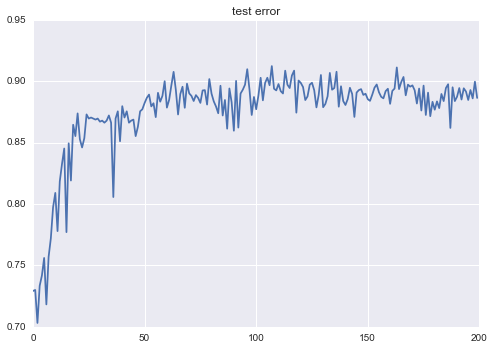

In [118]:
plt.title('test error')
plt.plot(acc_ls)

#### loss

In [91]:
loss = open('/Users/admin/Desktop/projects/lb_time/models/cnn/results/all_50/loss.txt', 'r')
loss_ls = []
for i, line in enumerate(loss):
    if i != 0:
        loss_ls.append(float(line.split('\t')[1].rstrip()))

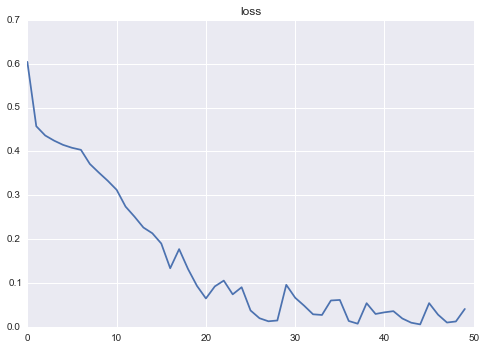

In [92]:
plt.title('loss')
plt.plot(loss_ls)